In [2]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

character(0)

Loading libraries

In [15]:
library("rootSolve")
library('ggplot2')
library('gridExtra')


Parametrization of the supply and demand functions for countries A and B

In [16]:
a0a = 1
a1a = 3
a2a = -0.9
b0a = 5
b1a = -0.5
b2a = 1.2
a0b = 11
a1b = 1.2
a2b = -0.8
b0b = 40
b1b = -0.5 
b2b = 0.9
ia = 10
ib = 10
wa = 2
wb = 2

Defining supply and demand functions for countries and A and B

In [17]:
#Supply function country A
Sa = function(x){
  a = ((a0a*(x)^a1a)*(wa)^a2a)
}

#Demand function country A 
Da = function(x){
  b = ((b0a*(x)^b1a)*(ia)^b2a)
}

#Supply function country B
Sb = function(x){
  c = ((a0b*(x)^a1b)*(wb)^a2b)
}

#Demand function country B 
Db = function(x){
  d = ((b0b*(x)^b1b)*(ib)^b2b)
}


Calculating prices and quantities traded in an autarky scenario using the "multiroot" function

In [19]:
#finding the price in country A
autarkyPriceCountryA = function(inputs) {
  pa = inputs[1]
  qa = inputs[2]
  
  s = Sa(pa) - qa
  d = Da(pa) - qa
  
  return(c(s,d))
}

SolA = multiroot(autarkyPriceCountryA, c(1,1));
pa = SolA$root[1];
qa = SolA$root[2];


#finding the price of country B
autarkyPriceCountryB = function(inputs) {
  pb=inputs[1]
  qb=inputs[2]
  
  s = Sb(pb) - qb
  d = Db(pb) - qb
  
  return(c(s,d))
}

Solb = multiroot(autarkyPriceCountryB, c(1,1));
pb = Solb$root[1];
qb = Solb$root[2];

1. **Price country A**=	4.168411
1. **Price country B**=	10.02022
1. **Demand (quantity) country A**=	38.81367
1. **Demand (quantity) country B**=	100.374


As can be observed above, country A has the lower autarky price, therefore there is an incentive for them to sell their product in country B, where a higher price can be obtained. In that way, country A is the exporter and country B is the importer.

After finding the exporting and importing countries the excess supply and excess demand functions were defined:

In [21]:
#excess supply country A
ES = function(x){
  d = ((a0a*(x)^a1a)*(wa)^a2a) - ((b0a*(x)^b1a)*(ia)^b2a)
}

#excess demand country B
ED = function(x){
  b = ((b0b*(x)^b1b)*(ib)^b2b) - ((a0b*(x)^a1b)*(wb)^a2b)
}

#excess demand country B, plus tariff type function switch
EDt = function(x){
  
  if (ad_valorum) {
    x =  x*(1+pi);
  }else{
    x = x + t;
  }
  
  b = ((b0b*(x)^b1b)*(ib)^b2b) - ((a0b*(x)^a1b)*(wb)^a2b)
}

Calculating the world equilibrium price and quantity using the multiroot funtion and the excess supply and demand funtions.

In [23]:
#finding the world price
autarkyPriceWorld = function(inputs) {
  pw=inputs[1]
  qw=inputs[2]
  
  ES = Sa(pw) - Da(pw) - qw
  ED = Db(pw) - Sb(pw) - qw
 
  return(c(ES,ED))
}

solw = multiroot(autarkyPriceWorld, c(1,1))

#quantities (q) /prices (p)
pw = solw$root[1];
qw = solw$root[2];

#pw = world price
#qw = world demand 

1. **World price** = 5.902626
1. **World demand** (quantity) = 77.58966


**Free trade welfare **

In order to calculate the welfare changes in both countries, one should integrate the area under the supply and demand curves in QP space representative of the changes in welfare.

In [ ]:
#Welfare analysis
WelfareConsumersCountryA = ia^b2a*b0a*((pa^(b1a+1))/(b1a+1)) - ia^b2a*b0a*((pw^(b1a+1))/(b1a+1));
WelfareConsumersCountryB = ib^b2b*b0b*((pb^(b1b+1))/(b1b+1)) - ib^b2b*b0b*((pw^(b1b+1))/(b1b+1));

WelfareProducersCountryA = wa^a2a*a0a*((pw^(a1a+1))/(a1a+1)) - wa^a2a*a0a*((pa^(a1a+1))/(a1a+1));
WelfareProducersCountryB = wb^a2b*a0b*((pw^(a1b+1))/(a1b+1)) - wb^a2b*a0b*((pb^(a1b+1))/(a1b+1));

#Net welfare 
NetWelfareCountryA = WelfareConsumersCountryA + WelfareProducersCountryA;
NetWelfareCountryB = WelfareConsumersCountryB + WelfareProducersCountryB;
worldWelfare = NetWelfareCountryB + NetWelfareCountryA;

#welfare changes in country A
WelfareConsumersCountryA
WelfareProducersCountryA
NetWelfareCountryA

#welfare changes in country B
WelfareConsumersCountryB
WelfareProducersCountryB
NetWelfareCountryB

#Net welfare for the world
worldWelfare

The impact of two tariff regimes were analyzed: an ad Valorum of 13% and a specific tariff of 2. The prices and quantities traded in the international market were analyzed using an equilibrium model considering the price linkage equations:

**Price B **= Price A + Specific tariff

or

**Price B** = Price A * (1+ Ad valorum)


In [29]:
####Tariff Set up####
ad_valorum = F
#tariffs 
t = 2
pi = 0.2

####Tariff evaluation####
#finding the world price with tatiffs
autarkyPriceWorld = function(inputs) {
  pat=inputs[1]
  qwt=inputs[2]

 
  if (ad_valorum) {
    pbt = pat*(1+pi)
  }else{
    pbt = pat + t
  }
 
  
  ES = Sa(pat) - Da(pat) - qwt
  ED = Db(pbt) - Sb(pbt) - qwt
 
  
  return(c(ES,ED))
}
solw = multiroot(autarkyPriceWorld, c(1,1))
    pat = solw$root[1];
    qwt = solw$root[2];


    if (ad_valorum) {
      pbt =  pat*(1+pi);
      Eq = "Ad valorum"
    }else{
      pbt = pat + t;
      Eq = "Specific"
    }
#quantities (q) and prices (p) after tariffs
#Type of tariff = Eq

#price in country A after tariff = pat

#world price = qwt

#price in country B after tariff = pbt

**Table 1 **- Prices and quantity traded in the a Free trade, Ad Valorum and Specific tariff scenarios

                           Free trade	Ad Valorum Tariff Specific Tariff
                                                                          
    Price Country A        5.902626         5.597404       5.352856
    Quantity Traded World  77.58966         60.4847        47.94073
    Price Country B	    5.902626         6.716884       7.352856



With the new  prices and quantities calculated, it is possible to calculate the impact of the two tariffs in the welfare of the two countries and the world. The welfare changes were analyzed by integrating the areas bellow the supply and demand curves of the countries A and B. 




In [ ]:
####Changes in Welfare ####

#Welfare analysis
WelfareConsumersCountryA = ia^b2a*b0a*((pw^(b1a+1))/(b1a+1)) - ia^b2a*b0a*((pat^(b1a+1))/(b1a+1));
WelfareConsumersCountryB = ib^b2b*b0b*((pw^(b1b+1))/(b1b+1)) - ib^b2b*b0b*((pbt^(b1b+1))/(b1b+1));

GovernmentRevenue = qwt*(pbt-pat)

WelfareProducersCountryA = wa^a2a*a0a*((pat^(a1a+1))/(a1a+1)) - wa^a2a*a0a*((pw^(a1a+1))/(a1a+1));
WelfareProducersCountryB = wb^a2b*a0b*((pbt^(a1b+1))/(a1b+1)) - wb^a2b*a0b*((pw^(a1b+1))/(a1b+1));

#Net welfare 
NetWelfareCountryA = WelfareConsumersCountryA + WelfareProducersCountryA;
NetWelfareCountryB = WelfareConsumersCountryB + WelfareProducersCountryB + GovernmentRevenue;
worldWelfare = NetWelfareCountryB + NetWelfareCountryA;

#Welfare changes for country A
WelfareConsumersCountryA
WelfareProducersCountryA
NetWelfareCountryA

#Welfare changes for country B
WelfareConsumersCountryB
WelfareProducersCountryB
NetWelfareCountryB
GovernmentRevenue

#World welfare change
worldWelfare


**Drawing the graph of the two tariffs**

Warning message:
“Removed 42 rows containing missing values (geom_path).”

Warning message:
“Removed 8 rows containing missing values (geom_path).”

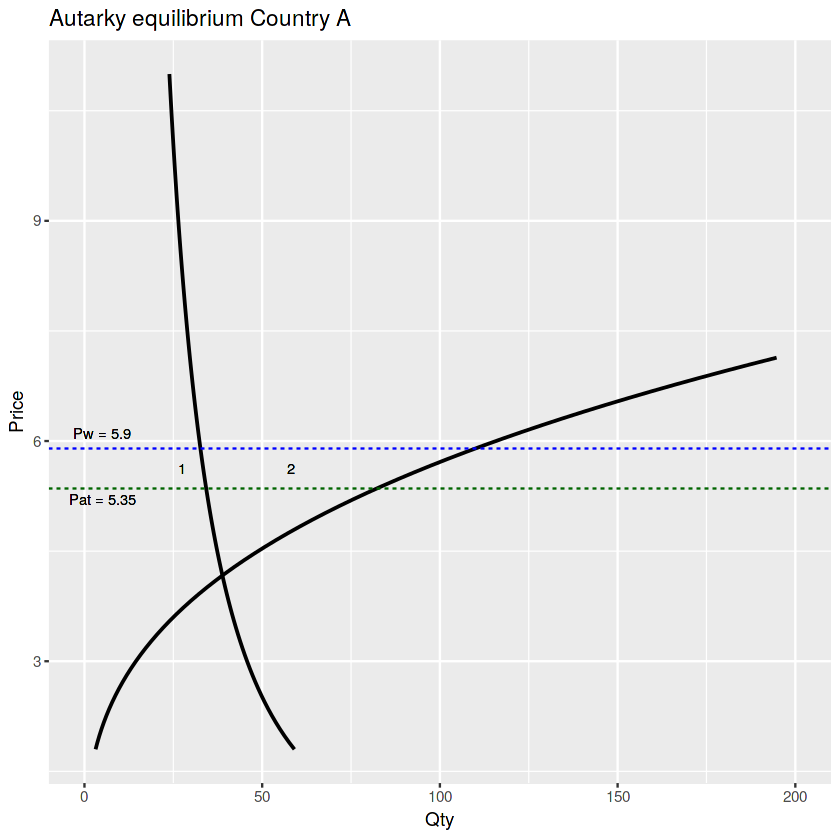

Warning message:
“Removed 64 rows containing missing values (geom_path).”Warning message:
“Removed 15 rows containing missing values (geom_path).”Warning message:
“Removed 33 rows containing missing values (geom_path).”

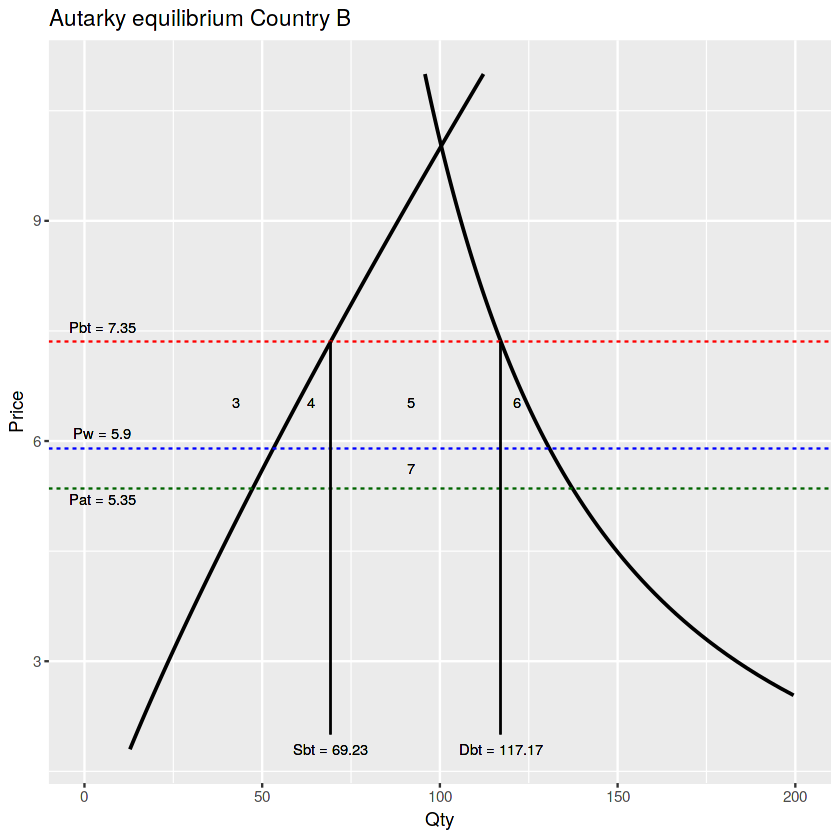

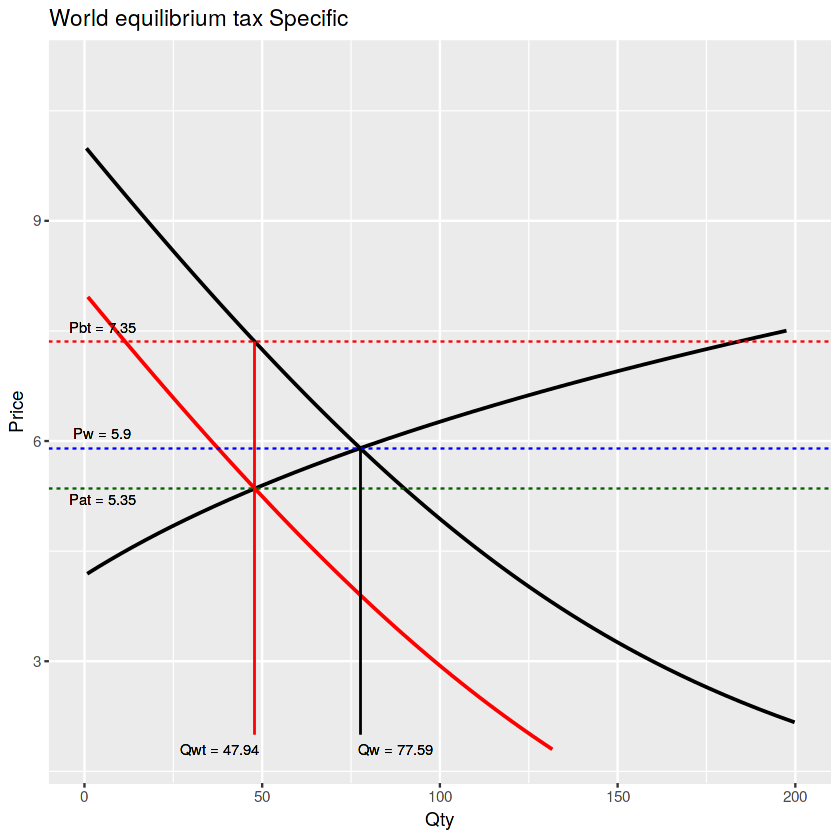

In [30]:

Autarky_A <- ggplot(data.frame(x=c(1.8, 11)), aes(x)) + 
  stat_function(fun=Da, size = 0.8) + 
  stat_function(fun=Sa, size = 0.8) +
  ylim(0, 200) +
  ggtitle("Autarky equilibrium Country A")  +
  labs(x = "Price", y = "Qty") +
  geom_vline(xintercept=pat, linetype="dashed", color = "dark green") +
  geom_vline(xintercept=pw, linetype="dashed", color = "blue") +
  geom_text(aes(x=pat-0.15, y=5, label=paste("Pat =",round(pat, digits=2))),size = 3) +
  geom_text(aes(x=pw+0.2, y=5, label=paste("Pw =",round(pw, digits=2))),size = 3) +
  geom_text(aes(x=(pw-pat)/2+pat, y=Da(pat)-Da(pat)*0.2, label="1"),size = 3) +
  geom_text(aes(x=(pw-pat)/2+pat, y=(Sa(pat)-Da(pat))/2 + Da(pat), label="2"),size = 3) +
  coord_flip();Autarky_A

Autarky_B <- ggplot(data.frame(x=c(1.8, 11)), aes(x)) + 
  stat_function(fun=Sb, size = 0.8) + 
  stat_function(fun=Db, size = 0.8) + 
  ylim(0, 200) +
  ggtitle("Autarky equilibrium Country B") +
  labs(x = "Price", y = "Qty") +
  geom_vline(xintercept=pbt, linetype="dashed", color = "red") +
  geom_vline(xintercept=pw, linetype="dashed", color = "blue") +
  geom_vline(xintercept=pat, linetype="dashed", color = "dark green") +
  geom_text(aes(x=pat-0.15, y=5, label=paste("Pat =",round(pat, digits=2))),size = 3) +
  geom_text(aes(x=pbt+0.2, y=5, label=paste("Pbt =",round(pbt, digits=2))),size = 3) +
  geom_text(aes(x=pw+0.2, y=5, label=paste("Pw =",round(pw, digits=2))),size = 3) +
  geom_segment(aes(x=pbt, xend=2, y=Sb(pbt), yend=Sb(pbt))) +
  geom_segment(aes(x=pbt, xend=2, y=Db(pbt), yend=Db(pbt))) +
  geom_text(aes(x=(pw-pbt)/2+pbt-0.1, y=Sb(pw)-Sb(pw)*0.2, label="3"),size = 3) +
  geom_text(aes(x=(pw-pbt)/2+pbt-0.1, y=Sb(pw)+Sb(pw)*ab, label="4"),size = 3) +
  geom_text(aes(x=(pw-pbt)/2+pbt-0.1, y=Db(pw)-Db(pw)*ad, label="6"),size = 3) +
  geom_text(aes(x=(pw-pbt)/2+pbt-0.1, y=(Db(pw)-Sb(pw))/2 + Sb(pw), label="5"),size = 3) +
  geom_text(aes(x=(pw-pat)/2+pat, y=(Db(pw)-Sb(pw))/2 + Sb(pw), label="7"),size = 3) +
  geom_text(aes(x=1.8, y=Sb(pbt), label=paste("Sbt =", round(Sb(pbt), digits=2))),size = 3) +
  geom_text(aes(x=1.8, y=Db(pbt), label=paste("Dbt =", round(Db(pbt), digits=2))),size = 3) + 
  coord_flip() ;Autarky_B

Autarky_W <- ggplot(data.frame(x=c(1.8, 11)), aes(x)) + 
  stat_function(fun=ES, size = 0.8) + 
  stat_function(fun=ED, size = 0.8) +
  stat_function(fun=EDt, size = 0.8 , color = "red") +
  ylim(0, 200) +
  ggtitle(paste("World equilibrium tax",Eq)) +
  labs(x = "Price", y = "Qty") +
  geom_vline(xintercept=pat, linetype="dashed", color = "dark green") +
  geom_vline(xintercept=pbt, linetype="dashed", color = "red") +
  geom_vline(xintercept=pw, linetype="dashed", color = "blue") +
  geom_text(aes(x=pat-0.15, y=5, label=paste("Pat =", round(pat, digits=2))),size = 3) +
  geom_text(aes(x=pbt+0.2, y=5, label=paste("Pbt =", round(pbt, digits=2))),size = 3) +
  geom_text(aes(x=pw+0.2, y=5, label=paste("Pw =", round(pw, digits=2))),size = 3) +
  geom_segment(aes(x=pbt, xend=2, y=qwt, yend=qwt), color = "red") +
  geom_segment(aes(x=pw, xend=2, y=qw, yend=qw)) +
  geom_text(aes(x=1.8, y=qwt-10, label=paste("Qwt =", round(qwt, digits=2))),size = 3) +
  geom_text(aes(x=1.8, y=qw+10, label=paste("Qw =", round(qw, digits=2))),size = 3) +
  coord_flip();Autarky_W
